In [1]:
import numpy as np  
import matplotlib.pyplot as plt  

In [60]:
class NeuralNetwork:
    def __init__(self, num_neurons, excitatory_ratio=0.3):
        self.num_neurons = num_neurons
        self.excitatory_ratio = excitatory_ratio  
        self.weights = np.random.randn(num_neurons, num_neurons)
        self.neuron_types = np.random.choice(
            ['excitatory', 'inhibitory'],
            size=num_neurons,
            p = [excitatory_ratio, 1-excitatory_ratio]
        )
        self.adjust_weights()

    def adjust_weights(self):
        for i, neuron_type in enumerate(self.neuron_types):
            if neuron_type == 'inhibitory':
                self.weights[i] = -np.abs(self.weights[i])
            else:
                self.weights[i] = np.abs(self.weights[i])

    def simulate(self, input_signal, num_steps):
        activity = np.zeros((num_steps, self.num_neurons))
        activity[0] = input_signal 

        for t in range(1, num_steps):
            activity[t] = np.tanh(np.dot(activity[t-1], self.weights))

        return activity

In [61]:
num_neurons = 1000  
network = NeuralNetwork(num_neurons)
input_signal = np.random.rand(num_neurons)
activity = network.simulate(input_signal, num_steps=1000)

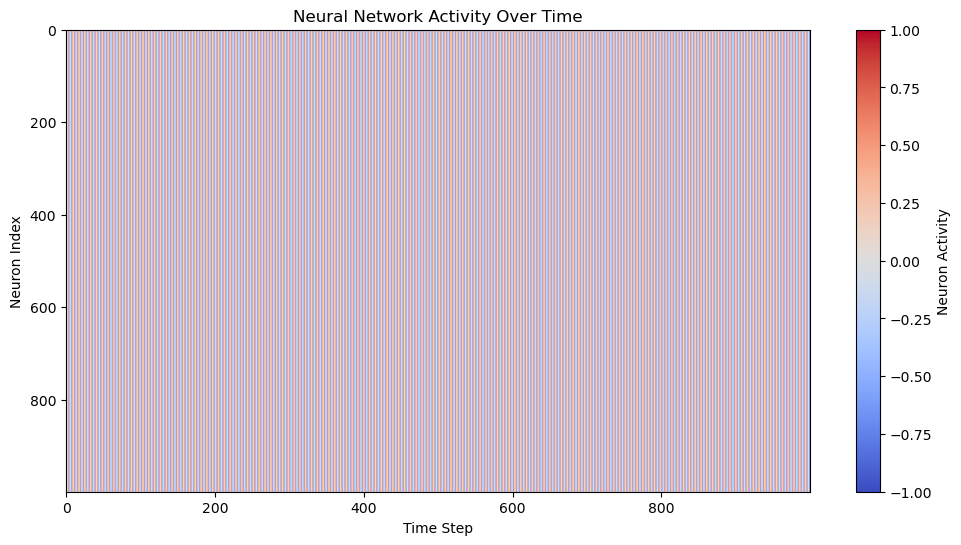

In [62]:
plt.figure(figsize=(12, 6))
plt.imshow(activity.T, aspect='auto', cmap='coolwarm')
plt.colorbar(label='Neuron Activity')
plt.xlabel('Time Step')
plt.ylabel('Neuron Index')
plt.title('Neural Network Activity Over Time')
plt.show()

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Neuron parameters
Ne, Ni = 800, 400
re, ri = np.random.rand(Ne), np.random.rand(Ni)

a = np.concatenate([0.02 * np.ones(Ne), 0.02 + 0.08 * ri])
b = np.concatenate([0.2 * np.ones(Ne), 0.25 - 0.05 * ri])
c = np.concatenate([-65 + 15 * re**2, -65 * np.ones(Ni)])
d = np.concatenate([8 - 6 * re**2, 2 * np.ones(Ni)])

# Synaptic weights
S = np.hstack([0.5 * np.random.rand(Ne+Ni, Ne), -np.random.rand(Ne+Ni, Ni)])

# Initial values
v = -65 * np.ones(Ne+Ni)
u = b * v
firings = []





In [94]:

for t in range(700):
    I = np.concatenate([5 * np.random.randn(Ne), 2 * np.random.randn(Ni)])
    
    fired = np.where(v >= 30)[0]
    firings.extend([(t, i) for i in fired])
    
    v[fired] = c[fired]
    u[fired] = u[fired] + d[fired]
    
    I += np.sum(S[:, fired], axis=1)
    
    v += 0.5 * (0.04 * v**2 + 5*v + 140 - u + I)
    v += 0.5 * (0.04 * v**2 + 5*v + 140 - u + I)
    u += a * (b*v - u)

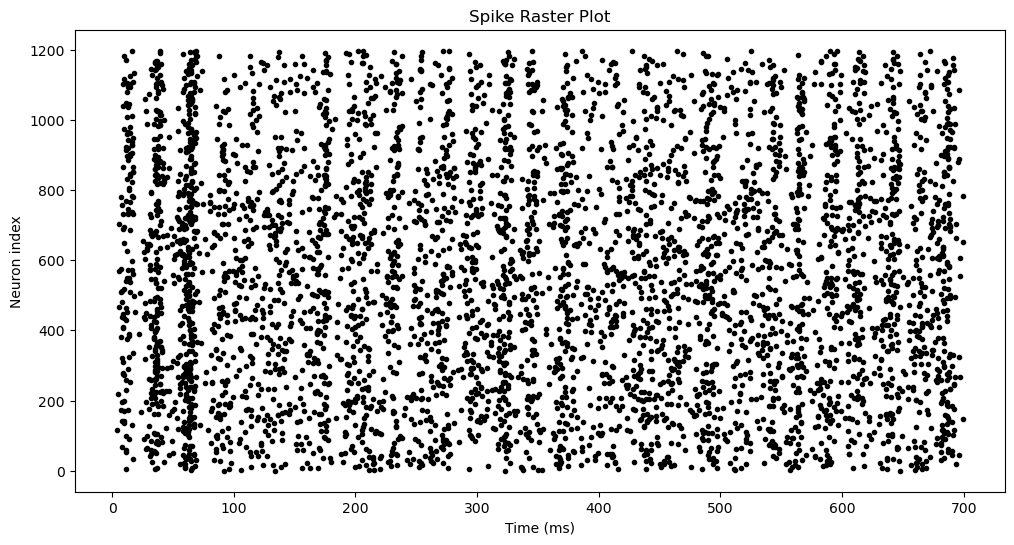

In [95]:
# Plotting
firings = np.array(firings)
plt.figure(figsize=(12, 6))
plt.plot(firings[:, 0], firings[:, 1], '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Spike Raster Plot')
plt.show()

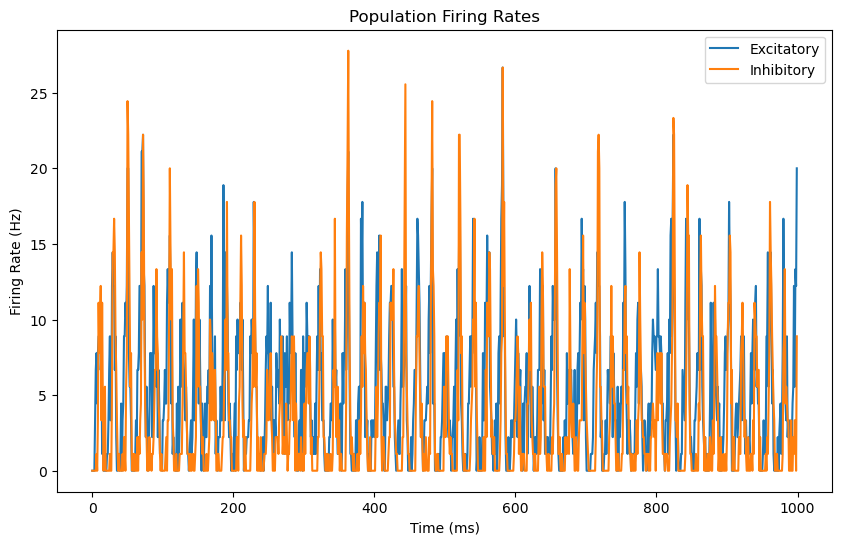

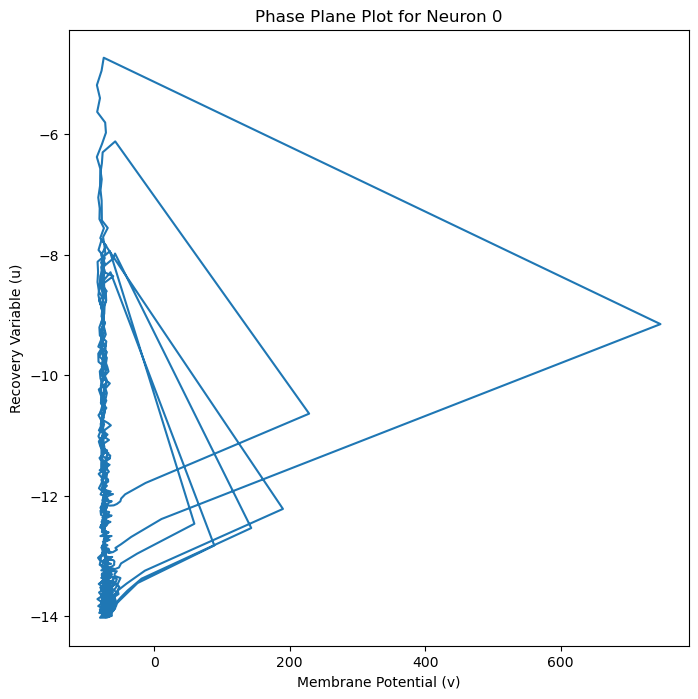

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


Ne, Ni = 900, 900
re, ri = np.random.rand(Ne), np.random.rand(Ni)

a = np.concatenate([0.02 * np.ones(Ne), 0.02 + 0.08 * ri])
b = np.concatenate([0.2 * np.ones(Ne), 0.25 - 0.05 * ri])
c = np.concatenate([-65 + 15 * re**2, -65 * np.ones(Ni)])
d = np.concatenate([8 - 6 * re**2, 2 * np.ones(Ni)])


S = np.hstack([0.5 * np.random.rand(Ne+Ni, Ne), -np.random.rand(Ne+Ni, Ni)])


v = -65 * np.ones(Ne+Ni)
u = b * v
firings = []
# Store v and u for all neurons at each timestep
v_history = np.zeros((1000, Ne+Ni))
u_history = np.zeros((1000, Ne+Ni))

for t in range(1000):
    I = np.concatenate([5 * np.random.randn(Ne), 2 * np.random.randn(Ni)])
    
    fired = np.where(v >= 30)[0]
    firings.extend([(t, i) for i in fired])
    
    v[fired] = c[fired]
    u[fired] = u[fired] + d[fired]
    
    I += np.sum(S[:, fired], axis=1)
    
    v += 0.5 * (0.04 * v**2 + 5*v + 140 - u + I)
    v += 0.5 * (0.04 * v**2 + 5*v + 140 - u + I)
    u += a * (b*v - u)

    v_history[t] = v
    u_history[t] = u




# 2. Population Activity Plot
excitatory_rate = np.mean(v_history[:, :Ne] > 30, axis=1) * 1000  # Hz
inhibitory_rate = np.mean(v_history[:, Ne:] > 30, axis=1) * 1000  # Hz

plt.figure(figsize=(10, 6))
plt.plot(excitatory_rate, label='Excitatory')
plt.plot(inhibitory_rate, label='Inhibitory')
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Population Firing Rates')
plt.legend()
plt.show()

# 3. Phase Plane Plot (for a single neuron)
neuron_index = 0  # Choose any neuron
plt.figure(figsize=(8, 8))
plt.plot(v_history[:, neuron_index], u_history[:, neuron_index])
plt.xlabel('Membrane Potential (v)')
plt.ylabel('Recovery Variable (u)')
plt.title(f'Phase Plane Plot for Neuron {neuron_index}')
plt.show()